<a href="https://colab.research.google.com/github/JimStrawberry/AI/blob/master/MNIST_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

initial accuracy: 0.1268
epoch 0 accuracy: 0.9404
epoch 1 accuracy: 0.9497


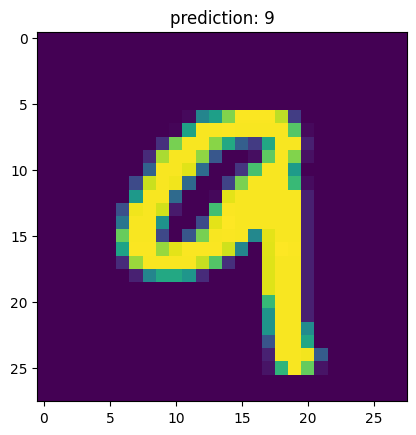

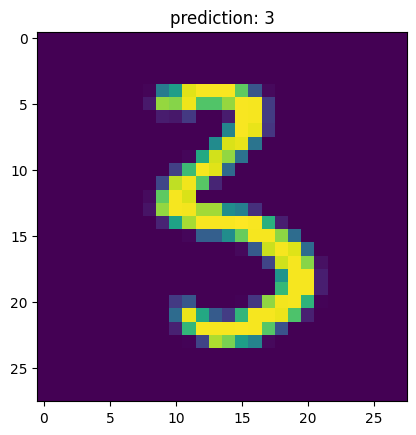

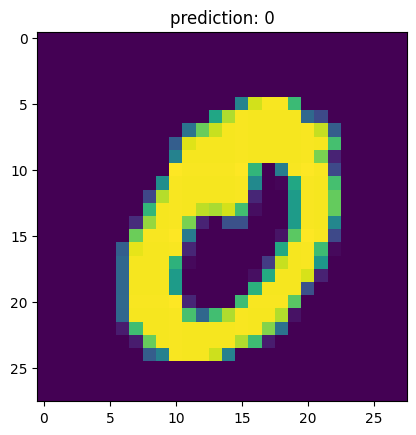

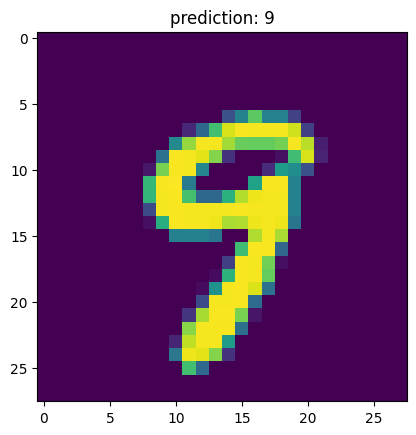

In [12]:
# define the model of NN
class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, 64) # Fully connected layer from input to first hidden layer
    self.fc2 = torch.nn.Linear(64, 64)
    self.fc3 = torch.nn.Linear(64, 64)
    self.fc4 = torch.nn.Linear(64, 10)

  def forward(self, x):
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    x = torch.nn.functional.relu(self.fc3(x))
    x = torch.nn.functional.log_softmax(self.fc4(x), dim=1)
    return x

def get_data_loader(is_train):
  # transforms.Compose: Combine multiple image transformation operations into a sequence of operations
  to_tensor = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
  data_set = datasets.MNIST("", is_train, transform=to_tensor,download=True)
  return DataLoader(data_set, batch_size=15, shuffle=True)

def evaluate(test_data, net):
  n_correct = 0 # Initialize the counter of correct predictions
  n_total = 0 # Initialize the counter of total predictions
  '''
  torch.no_grad(): Using this context manager you can disable gradient
  calculations. When evaluating the model, we do not need to calculate
  gradients, which saves memory and computation time.
  '''
  with torch.no_grad():
    for (x, y) in test_data:
      outputs = net.forward(x.view(-1, 28 * 28))
      for i, output in enumerate(outputs):
        if torch.argmax(output) == y[i]:
          n_correct += 1
        n_total += 1
  return n_correct / n_total

def main():

  train_data = get_data_loader(is_train=True)
  test_data = get_data_loader(is_train=False)
  net = Net()

  print("initial accuracy:", evaluate(test_data, net))
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001) # Initialize an Adam optimizer
  for epoch in range(2):
    for (x, y) in train_data:
      '''
      net.zero_grad(): Ensure that only the necessary steps for gradient calculation
      are performed using the current batch of data in each training
      iteration. This helps avoid errors caused by gradient accumulation,
      thereby ensuring that the updates of model parameters are accurate.
      '''
      net.zero_grad()
      output = net.forward(x.view(-1, 28 * 28))
      loss = torch.nn.functional.nll_loss(output, y)
      loss.backward()
      optimizer.step() # Update the model parameters according to the currently calculated gradient
    print("epoch", epoch, "accuracy:", evaluate(test_data, net))
  for (n, (x, _)) in enumerate(test_data):
    if n > 3:
      break
    predict = torch.argmax(net.forward(x[0].view(-1, 28 * 28)))
    plt.figure(n)
    plt.imshow(x[0].view(28, 28))
    plt.title("prediction: " + str(int(predict)))
  plt.show()

if __name__ == "__main__":
  main()

